In [1]:
from __future__ import print_function, division
import numpy as np
import nsfg

resp = nsfg.ReadFemResp()

In [2]:
school = resp[resp.hieduc <= 10]
university = resp[resp.hieduc > 10]

In [3]:
print(school.agemomb1.mean())
print(school.agemomb1.max())
print(school.agemomb1.min())
print(school.agemomb1.var())
print(school.agemomb1.std())
print(school.agemomb1.median())

3.82720989451
96
1
114.010523813
10.6775710634
3.0


In [4]:
print(university.agemomb1.mean())
print(university.agemomb1.max())
print(university.agemomb1.min())
print(university.agemomb1.var())
print(university.agemomb1.std())
print(university.agemomb1.median())

4.37902097902
96
1
124.163645496
11.1428742027
3.0


In [5]:
import thinkstats2
import thinkplot

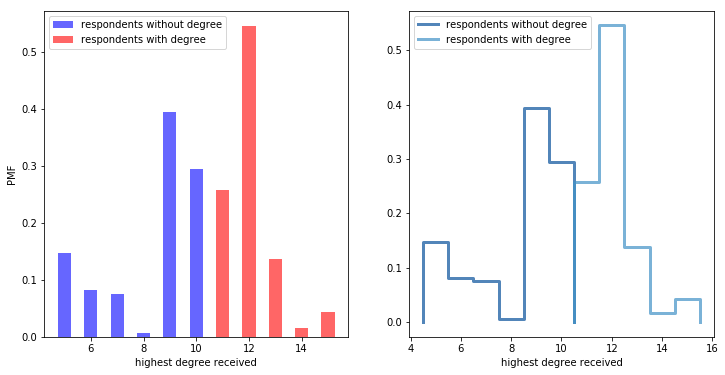

In [6]:
width = 0.5

school_pmf = thinkstats2.Pmf(school['hieduc'], label='respondents without degree')
uni_pmf = thinkstats2.Pmf(university['hieduc'], label='respondents with degree')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(school_pmf, width=width, color='blue')
thinkplot.Hist(uni_pmf, width=width, color='red')
thinkplot.Config(xlabel='highest degree received',ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([school_pmf,uni_pmf])
thinkplot.Config(xlabel='highest degree received')

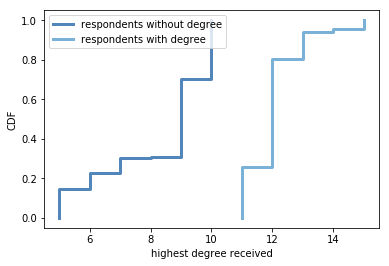

In [7]:
school_cdf = thinkstats2.Cdf(school['hieduc'], label='respondents without degree')
uni_cdf = thinkstats2.Cdf(university['hieduc'], label='respondents with degree')

thinkplot.PrePlot(2)
thinkplot.Cdfs([school_cdf, uni_cdf])
thinkplot.Config(xlabel='highest degree received', ylabel='CDF', loc='upper left')

In [8]:
school.agemomb1.loc[school.agemomb1>5] = np.nan
school_age_dropna = school.agemomb1.dropna()

university.agemomb1.loc[university.agemomb1>5] = np.nan
uni_age_dropna = university.agemomb1.dropna()

#resp.agemomb1.loc[resp.agemomb1>5] = np.nan
#resp.agemomb1.dropna()

C:\Users\moyinoluwajawo\AppData\Roaming\Python\Python27\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\moyinoluwajawo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\moyinoluwajawo\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

[0.12716445329105003, 0.05640542173863464, -0.0835601457783593, -0.07940429084393757, -0.020605438407387815]


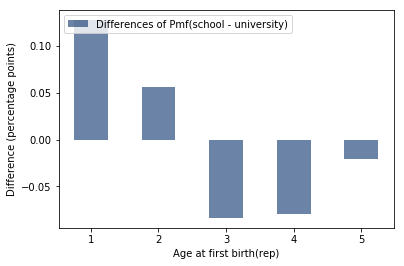

In [9]:
#resp.agemomb1.loc[resp.agemomb1>5] = np.nan
#resp.agemomb1.dropna()

school_age_pmf = thinkstats2.Pmf(school.agemomb1, label='age at 1st birth(school)')
uni_age_pmf = thinkstats2.Pmf(university.agemomb1, label='age at 1st birth(university)')

represented_ages = range(1, 6)
diffs = []
for age in represented_ages:
    p1 = school_age_pmf.Prob(age)
    p2 = uni_age_pmf.Prob(age)
    diff = (p1 - p2)
    diffs.append(diff)
print(diffs)

thinkplot.Bar(represented_ages, diffs, label="Differences of Pmf(school - university)", width = 0.5)
thinkplot.Config(xlabel='Age at first birth(rep)', ylabel='Difference (percentage points)')

In [10]:
school_cdf = thinkstats2.Cdf(school.agemomb1, label='age at 1st birth(school)')
uni_cdf = thinkstats2.Cdf(university.agemomb1, label='age at 1st birth(university)')

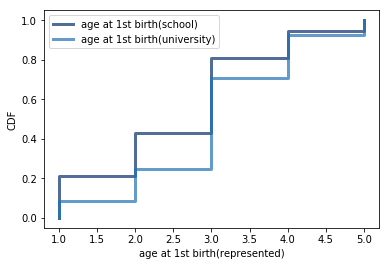

In [11]:
#thinkplot.PrePlot(2)
thinkplot.Cdfs([school_cdf, uni_cdf])
thinkplot.Config(xlabel='age at 1st birth(represented)', ylabel='CDF', loc='upper left')

In [12]:
school_cdf.Prob(1)
# There is 0.21 probability that the age of mothers without a degree at first birth is less than 18 years old
# About 21% of the mothers without a degree at first birth have ages less than 18 years old

0.2123110947290822

In [18]:
uni_cdf.Prob(1)
# There is 0.085 probability that the age of mothers with a degree at first birth is less than 18 years old
# About 8% of the mothers with a degree at first birth have ages less than 18 years old

0.08514664143803216

In [19]:
school_ranks = []
for age in represented_ages:
    if age > 1:
        rank = school_cdf.PercentileRank(age)
        school_ranks.append(rank)
print(school_ranks) # gives a list of percentile rank of ages 18 years or more for respondents without a degree
print('The ages of mothers aged 18 and older is above the %d percentile for respondents without a degree.'%school_cdf.PercentileRank(1))

[43.14412089937339, 80.81459638776263, 94.39734611131588, 100.0]
The ages of mothers aged 18 and older is above the 21 percentile for respondents without a degree.


In [20]:
uni_ranks = []
for age in represented_ages:
    if age > 1:
        rank = uni_cdf.PercentileRank(age)
        uni_ranks.append(rank)
print(uni_ranks) # gives a list of percentile rank of ages 18 years or more for respondents with a degree
print('The ages of mothers aged 18 and older is above the %d percentile for respondents with a university degree.'%uni_cdf.PercentileRank(1))

[24.78713339640492, 70.81362346263008, 92.3368022705771, 100.0]
The ages of mothers aged 18 and older is above the 8 percentile for respondents with a university degree.


In [21]:
from scipy.stats import norm,expon
import matplotlib.pyplot as plt

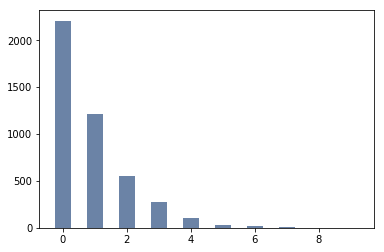

In [50]:
bfd_wks = resp.cebow
hist = thinkstats2.Hist(bfd_wks, label='wks')
thinkplot.Hist(hist,width=0.5)

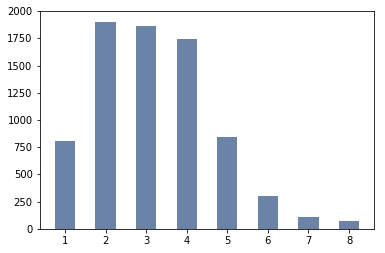

In [41]:
hh = resp.roscnt
hist = thinkstats2.Hist(hh, label='household members')
thinkplot.Hist(hist,width=0.5)

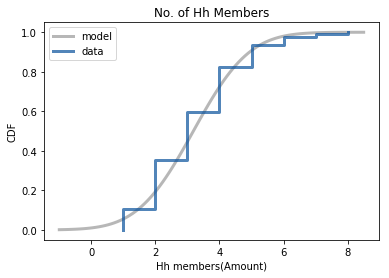

In [42]:
mu, var = thinkstats2.TrimmedMeanVar(hh, p=0.01)
sigma = np.sqrt(var)

xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=-1.0, high=8.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

cdf = thinkstats2.Cdf(hh, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='No. of Hh Members',
                 xlabel='Hh members(Amount)',
                 ylabel='CDF')